# Drone DAT Processing Template

### Annie Polish, 2020

This is the most up-to-date drone data processing notebook. 
To use it to process your data set, first make a copy of this notebook.
Unlike previous versions, the drone data object is just a Pandas DataFrame, and supports all of the usual Pandas/Matplotlib/Seaborn plotting functions

#### The drone.py module
The drone.py module contains the bulk of the code that must be run for every drone data file. It contains two general types of functionality:
1. Some regular functions. These are accessed using drone.function_name(). They mostly concern file IO and preprocessing.
2. A Pandas DataFrame Accessor API extension. This is a fancy name for a class that adds more functionality to Pandas DataFrame objects. Given a Pandas DataFrame object df, the functions in drone.py are accessed using df.drone.function_name()

In [1]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import pandas as pd
import pymap3d as pm
#from math import *
from datetime import datetime
from matplotlib.transforms import offset_copy
from matplotlib.ticker import FormatStrFormatter
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopy.distance
from scalebar import scale_bar #requires the existance of scalebar.py
import pyproj
from scipy.stats import norm

import drone

plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams.update({'font.size': 16})


## File preprocessing and intake

In [2]:
#process the files
# USEFUL FILES:
# FLY188: Monday morning grid
# FLY189: Monday morning RFI
# FLY191: Monday afternoon
# FLY196: Tuesday morning RFI
# FLY197: Tuesday morning noise source on
# FLY200: Tuesday afternoon absolute GPS test
# FLY203: Wednesday morning
# FLY204: Wednesday morning
# FLY206_FLY207_FLY208_FLY209_FLY210: Wednesday afternoon absolute
# FLY215: Thursday morning beam map

# Write down the name of our file for future reference
NAME = 'FLY342'
#NAME = 'FLY206_FLY207_FLY208_FLY209_FLY210'

drone.process_files([NAME])

Index(['Lat', 'Lon', 'hmsl', 'sec_elapsed', 'datetimestamp', 'tick', 'vel',
       'yaw_rtk', 'pitch_rtk', 'pitch', 'roll', 'yaw', 'yaw_360', 'IMU_lat',
       'IMU_lon', 'IMU_hmsl', 'no_rtk_lat', 'no_rtk_lon', 'timestamp'],
      dtype='object')
STAPLING...
FLY342_
Saved NPZ
Saved CSV


Lat        Lon       hmsl  sec_elapsed         datetimestamp  \
0       40.870296 -72.865609  23.053627       34.753  2020-03-12T17:06:35Z   
1       40.870296 -72.865609  23.053627       34.764  2020-03-12T17:06:35Z   
2       40.870296 -72.865609  23.053627       34.774  2020-03-12T17:06:35Z   
3       40.870296 -72.865609  23.053627       34.784  2020-03-12T17:06:35Z   
4       40.870296 -72.865609  23.053627       34.794  2020-03-12T17:06:35Z   
...           ...        ...        ...          ...                   ...   
155375  40.870319 -72.865617  23.997993     1635.109  2020-03-12T17:33:15Z   
155376  40.870319 -72.865617  23.997993     1635.120  2020-03-12T17:33:15Z   
155377  40.870319 -72.865617  23.997993     1635.130  2020-03-12T17:33:15Z   
155378  40.870319 -72.865617  23.997993     1635.142  2020-03-12T17:33:15Z   
155379  40.870319 -72.865617  23.997993     1635.152  2020-03-12T17:33:15Z   

              tick       vel  yaw_rtk  pitch_rtk     pitch      roll  \
0        167823981  0.014580      356   43.11523 -3.072645 -0.227516   
1        167873358  0.014328      356   43.11523 -3.073268 -0.228823   
2        167918576  0.014120      356   43.11523 -3.073356 -0.229727   
3        167963619  0.013228      356   43.11523 -3.072757 -0.230052   
4        168008821  0.011850      356   43.11523 -3.073451 -0.230155   
...            ...       ...      ...        ...       ...       ...   
155375  7369427858  0.024716      248    4.19741  0.361437  0.534081   
155376  7369478096  0.024974      248    4.19741  0.361282  0.535350   
155377  7369523137  0.024876      248    4.19741  0.360097  0.536425   
155378  7369575027  0.023780      248    4.19741  0.359427  0.538096   
155379  7369620680  0.022757      248    4.19741  0.358683  0.538893   

              yaw     yaw_360    IMU_lat    IMU_lon   IMU_hmsl  no_rtk_lat  \
0      -17.946250  342.053750   0.000000   0.000000   0.000000   40.870265   
1      -17.946773  342.053227   0.000000   0.000000   0.000000   40.870265   
2      -17.970188  342.029812   0.000000   0.000000   0.000000   40.870265   
3      -17.970041  342.029959   0.000000   0.000000   0.000000   40.870265   
4      -17.993147  342.006853   0.000000   0.000000   0.000000   40.870265   
...           ...         ...        ...        ...        ...         ...   
155375 -21.794851  338.205149  40.870318 -72.865619 -23.997020   40.870289   
155376 -21.793517  338.206483  40.870318 -72.865619 -23.996977   40.870289   
155377 -21.792397  338.207603  40.870318 -72.865619 -23.996930   40.870289   
155378 -21.793458  338.206542  40.870318 -72.865619 -23.996881   40.870289   
155379 -21.795610  338.204390  40.870318 -72.865619 -23.996830   40.870289   

        no_rtk_lon               timestamp  
0       -72.865616 2020-03-12 17:06:35.000  
1       -72.865616 2020-03-12 17:06:35.032  
2       -72.865616 2020-03-12 17:06:35.064  
3       -72.865616 2020-03-12 17:06:35.096  
4       -72.865616 2020-03-12 17:06:35.129  
...            ...                     ...  
155375  -72.865615 2020-03-12 17:33:15.285  
155376  -72.865615 2020-03-12 17:33:15.428  
155377  -72.865615 2020-03-12 17:33:15.571  
155378  -72.865615 2020-03-12 17:33:15.714  
155379  -72.865615 2020-03-12 17:33:15.857  

[155380 rows x 19 columns]

In [3]:
# Read the processed file into pandas
df = pd.read_csv("./csv_out/"+NAME+"_processed.csv", sep=',', header=0)

# When the file is first read, all the timestamps will be strings
# So convert them to datetime objects
df = df.assign(timestamp = pd.to_datetime(df.timestamp))

# Drop all rows containing nothing at all, or more than two NaNs
#df = df.where(df != 0.) 
#df.dropna(thresh=2, inplace=True)

# Initialize the name of the df, for ease of plot titling
df.drone.name = NAME

## Plotting


### Satellite map plot

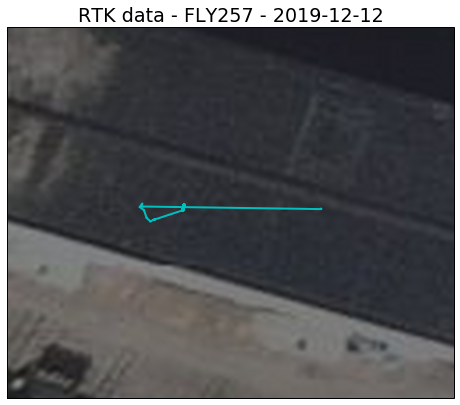

In [4]:
##########################
### SATELLITE MAP PLOT ###
##########################

# How far the plot extends beyond the edges of the data
# DO NOT EXCEED 0.001 !!!
# If this cell takes forever, decrease the value of BORDER.
BORDER = 0.00005

fig = plt.figure()

# add a subplot in the coordinate system of the tiles
ax = fig.add_subplot(1, 1, 1, projection=drone.PLOT_BG.crs) 

# set the extents of the plot to be a box around the data
ax.set_extent([min(df.Lon)-BORDER, max(df.Lon)+BORDER, min(df.Lat)-BORDER, max(df.Lat)+BORDER], crs=ccrs.Geodetic())

# use cartopy to add a satellite map to the background
ax.add_image(drone.PLOT_BG, 20, interpolation='spline36')

# plot the data, transformed into the coordinate system of our plot
plt.plot(df.Lon, df.Lat, 'c', linewidth=2, transform=ccrs.Geodetic(), label="RTK")

# label and save
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("RTK data - "+df.drone.name+" - "+str(df.timestamp[0])[:10])
plt.savefig("./plots/"+df.drone.name+".png")
plt.show()

### Plotting a variable over time

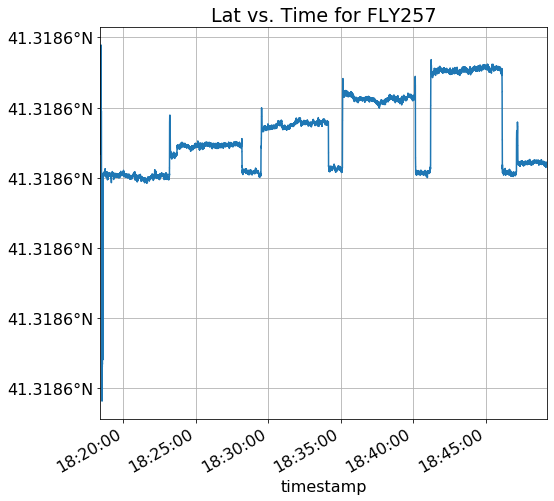

In [5]:
# The Pandas way

# Substitute "Lat" for your choice of column
col_to_plot = "Lat"

# df.plot is a Pandas funtion that eventually calls MatPlotLib's plt.figure() and plt.plot()
# for a full list of options, see:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
df.plot("timestamp", col_to_plot, title = col_to_plot+" vs. Time for "+df.drone.name, legend=False, grid=True)

# Get Current Axes
ax = plt.gca()

# Format the timestamp on the x axis as HH:MM:SS
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
ax.xaxis_date()

# Uncomment this line to format a latitude axis
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LATITUDE_FORMATTER)

# Uncomment this line to format a longitude axis 
#ax.yaxis.set_major_formatter(LONGITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LONGITUDE_FORMATTER)

plt.show()

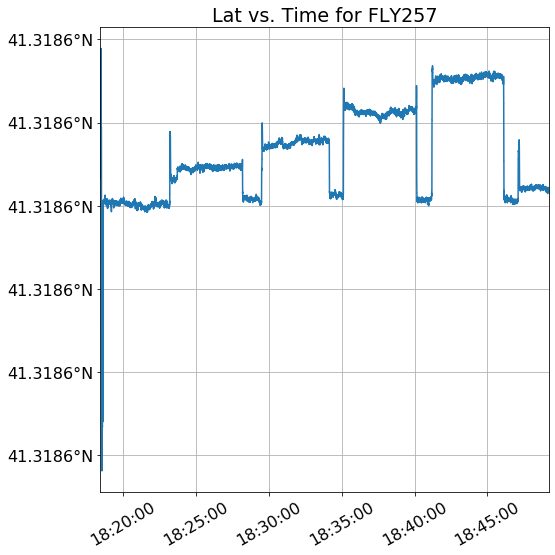

In [6]:
# The matplotlib way

# Produces an identical plot to the one above, using only MatPlotLib functions
# I like the Pandas version, but this works too.

fig = plt.figure()
ax = plt.gca()

# Format the timestamp on the x axis as HH:MM:SS
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
ax.xaxis_date()

# Uncomment this line to format a latitude axis
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LATITUDE_FORMATTER)

# Uncomment this line to format a longitude axis 
#ax.yaxis.set_major_formatter(LONGITUDE_FORMATTER); ax.yaxis.set_minor_formatter(LONGITUDE_FORMATTER)

plt.title(col_to_plot+" vs. Time for "+df.drone.name)
plt.plot(df.timestamp, df[col_to_plot].values)
plt.grid()
plt.xlim(min(df.timestamp),max(df.timestamp))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


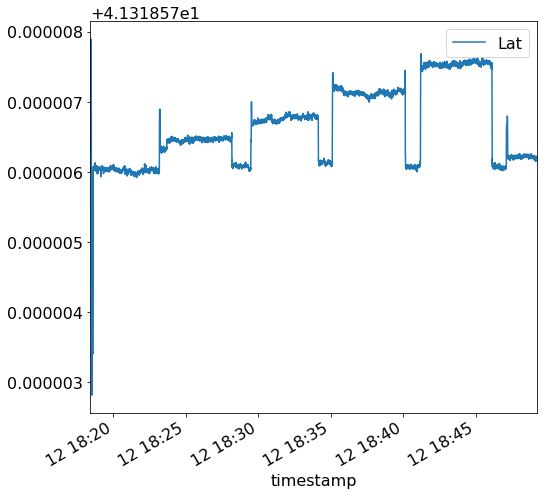

In [7]:
# The quick and lazy way
# This doesn't give you any fancy formatting, but it's a really fast way to look at the data
df.plot("timestamp", col_to_plot)

<IPython.core.display.Javascript object>


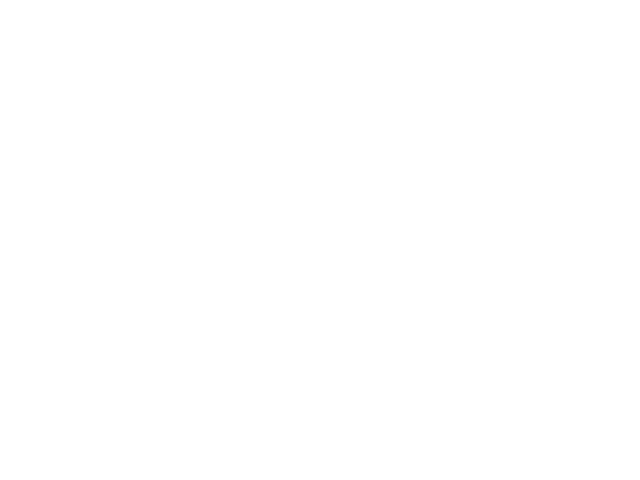

In [8]:
# the matplotlib notebook directive makes plots interactive
# it's great for finding timestamps
# it also slows down the notebook and is kind of broken sometimes
# disable it when you're done by using %matplotlib inline IN A NEW CELL
# don't try to use both inline and notebook in a single cell

%matplotlib notebook
df.plot("timestamp", "Lat")

In [9]:
%matplotlib inline

## Statistics and other data analysis

### Measuring distances

In [10]:
# df.drone.dist(start_time, end_time) measures the distance between the positions at the two timestamps
# and returns the distance in meters

# print out the first timestamp to use as a reference
print(df.timestamp[0])

# pick the other timestamps by looking at the plots:

# within one point
df.drone.dist("2019-12-12 18:20:00", "2019-12-12 18:22:00")

# between two points
df.drone.dist("2019-12-12 18:20:00", "2019-12-12 18:26:00")

# note that df.drone.dist() both prints the result and returns it as a number

2019-12-12 18:18:25.016000
distance: 0.007068773753109021
distance: 0.046637682453081926


0.046637682453081926

### Basic statistics

In [11]:
# df.drone.stats(start_time, end_time) does some statistics on the time interval
# specifically, it returns (lat_stddev, lon_stddev, hmsl_stddev, diag_distance)
# where all the stddev's are for their respective coordinate,
# and diag_distance is the distance from one corner of the distribution to the other

# within one point
df.drone.stats("2019-12-12 18:20:00", "2019-12-12 18:22:00")

# between two points
df.drone.stats("2019-12-12 18:20:00", "2019-12-12 18:26:00")

# note that df.drone.stats() both prints the result and returns it as a tuple

Latitude standard deviation: 0.020021664822838653 meters
Longitude standard deviation: 0.017919349814399146 meters
Height standard deviation: 0.0058094605208698965 meters
Diagonal lat-lon distance: 0.02686950241535748 meters
Latitude standard deviation: 0.10749123417342968 meters
Longitude standard deviation: 0.03517459972194453 meters
Height standard deviation: 0.00800775972922319 meters
Diagonal lat-lon distance: 0.11310003487942043 meters


(2.1968588986448285e-07,
 6.985237896283484e-08,
 0.00800775972922319,
 0.11310003487942043)

Standard deviation of pitch, in degrees: 0.6629633449268251


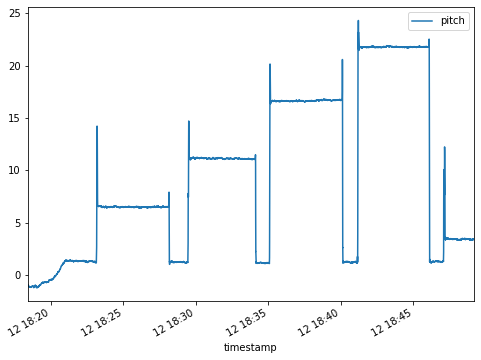

In [12]:
# This test data (FLY257) is actually an angular measurement test, so we care about pitch more than lat/lon
df.plot("timestamp", "pitch", figsize=(8,6))

# Here's how to do statistics on that column:
point_df = df.drone.chop_time("2019-12-12 18:20:00", "2019-12-12 18:22:00")
point_stddev = np.std(point_df.pitch)
print("Standard deviation of pitch, in degrees: "+str(point_stddev))

### How to analyze a ground test

The example data in this template is a ground test with 5 test points. It might be annoying to look at each of them manually, one at a time. Here's an example of something you can do instead:

Point 1: 1.342 ± 0.041 Degrees
Point 2: 6.503 ± 0.033 Degrees
Point 3: 11.151 ± 0.041 Degrees
Point 4: 16.651 ± 0.050 Degrees
Point 5: 21.792 ± 0.038 Degrees


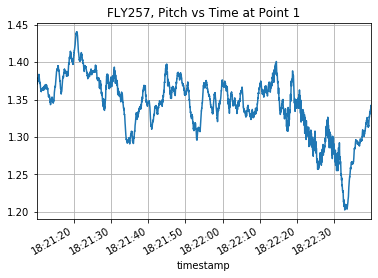

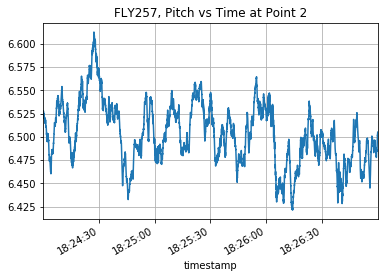

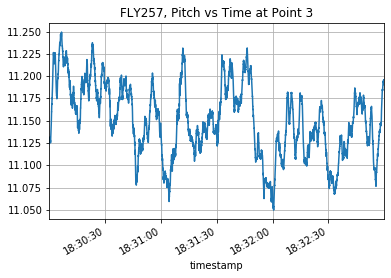

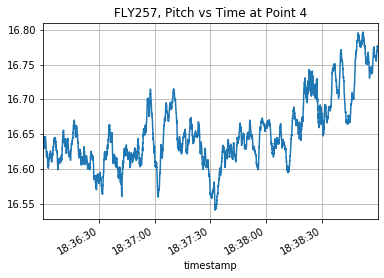

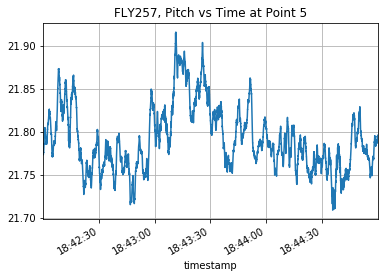

In [13]:
# make an array containing timestamps
pt_arr = np.array([["2019-12-12 18:21:10", "2019-12-12 18:22:40"],
                   ["2019-12-12 18:24:00", "2019-12-12 18:27:00"],
                   ["2019-12-12 18:30:00", "2019-12-12 18:33:00"],
                   ["2019-12-12 18:36:00", "2019-12-12 18:39:00"],
                   ["2019-12-12 18:42:00", "2019-12-12 18:45:00"]])
pt_arr = pt_arr.astype(np.datetime64) # convert from strings to real timestamps

# extract a dataframe for each point
df_arr = []
for point in pt_arr:
    df_arr.append(df.drone.chop_time(point[0], point[1]))
    
# df_arr is now an array of pandas dataframes, one for each point. 
    
# print the average and stddev of the pitch for each point
i = 1
for point_df in df_arr:
    avg = np.mean(point_df.pitch)
    std = np.std(point_df.pitch)
    print("Point %d: %.3f ± %.3f Degrees"%(i, avg, std))
    i+=1
    
# just for fun, plot every point
i = 1
for point_df in df_arr:
    point_df.plot("timestamp", "pitch", title = df.drone.name+", Pitch vs Time at Point "+str(i), legend=False, grid=True)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
    plt.show()
    i+=1

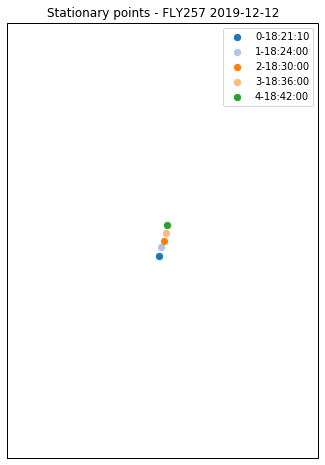

In [61]:
# Plot a point plot of the point array

# Plot border size, in degrees
BORDER = 0.00001

# get the coordinates from the point dataframes
coords_arr = []
for point_df in df_arr:
    # take the 0th and 1st coordinates for lat and lon (cut hmsl)
    coords_arr.append(point_df.drone.center[0:2])
    
# convert to numpy array for better indexing
coords_arr = np.asarray(coords_arr)
    
# find the date for plot labels
date = str(df_arr[0]["timestamp"].values[0])[:10]

# make a new figure
fig = plt.figure(figsize=(8,8))

# add a subplot in the lat-lon projection
ax = fig.add_subplot(1,1,1, projection=drone.PLOT_BG.crs)

# set the colormap to a paired colormap with 10 pairs of colors
cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

# set the plot to include an area around the points
ax.set_extent([min(coords_arr[:,1])-BORDER, max(coords_arr[:,1])+BORDER, 
    min(coords_arr[:,0])-BORDER, max(coords_arr[:,0])+BORDER], crs=ccrs.Geodetic())

# plot each point
for i in range(len(coords_arr)):
    lat = coords_arr[i][0]
    lon = coords_arr[i][1]
    plt.scatter(lon, lat, label=str(i)+"-"+str(df_arr[i].timestamp.values[0])[11:19], 
                transform=ccrs.Geodetic(), s=40)

# label stuff
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Stationary points - "+df_arr[0].drone.name+" "+str(date))
plt.grid()
fig.canvas.draw()
plt.show()
